In [1]:
%matplotlib inline
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")
import yaml

In [7]:
line_list_dir = "/user/jcarlberg/research/branton_project/abun/metal_line_list/"

list1 = "melendez2014_table1_noFe.txt"
list2 = "jkc_thesis_metal_ll.txt"


min_wav = 4850.0
max_wav = 9150.0

In [8]:
line_list1 = pd.read_csv(os.path.join(line_list_dir, list1), delim_whitespace=True,skiprows=25, usecols = [0,1,2,3],names=["Wavelength", "Ion", "EP", "Log_gf"])
line_list1 = line_list1[(line_list1["Wavelength"] < max_wav) & (line_list1["Wavelength"] > min_wav)]
species_list1 = pd.read_csv(os.path.join(line_list_dir, list1), delimiter='#',skiprows=1, usecols = [1],header=None)
line_list1['Source'] = [list1]*len(line_list1)

line_list2 = pd.read_csv(os.path.join(line_list_dir, list2),delim_whitespace=True, skiprows=1,header=None, usecols=[0,1,2,3],names=["Wavelength", "Ion", "EP", "Log_gf"])
line_list2 = line_list2[(line_list2["Wavelength"] < max_wav) & (line_list2["Wavelength"] > min_wav)]
line_list2['Source'] = [list2]*len(line_list2)


In [9]:
frames=[line_list1, line_list2]
#master_line_list = pd.concat(frames).drop_duplicates(subset="Wavelength").sort_values("Wavelength")
line_df = pd.concat(frames,ignore_index=True)
line_df = line_df.sort_values("Wavelength")
dup_mask = (abs(line_df.groupby('Ion').Wavelength.diff()) < 0.1) | (abs(line_df.groupby('Ion').Wavelength.diff(periods=-1)) < 0.1)
s_mask = line_df['Source'] == 'jkc_thesis_metal_ll.txt'
mask = dup_mask & s_mask

ion_list = ['I',"II",'III','IV','V','VI']
species_list = ["H","He", "Li",'Be','B','C','N','O','F','Ne',
               'Na','Mg','Al','Si','P','S','Cl','Ar','K','Ca',
               'Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu',
               'Zn','Ga','Ge','As','Se','Br','Kr','Rb','Sr','Y',
               'Zr','Nb','Mo','Tc','Ru','Rh','Pd','Ag','Cd','In',
               'Sn','Sb','Te','I','Xe','Cs','Ba','La','Ce','Pr',
               'Nd','Pm','Sm','Eu', 'Gd','Tb','Dy','Ho','Er','Tm',
               'Yb']

overlap = line_df[dup_mask]
master_line_list = line_df[~mask]

In [10]:
# Fe Lines
fe_df = pd.read_csv("../data/ew_known/tame_inputs/col110_1134red_oned_25jan14.ew", header = None, delimiter = ' ', names = ["Wavelength","Ion",'EP','Log_gf','EQW'])
fe_df = fe_df[['Wavelength',"Ion",'EP','Log_gf']]
species = [f'Fe {(int(str(float(ion[1]))[-1])+1)*"I"}' for ion in fe_df[["Ion"]].iterrows()]
fe_df['Source'] =  ["Fe Line List"]*len(species)
fe_df['Species'] = species
fe_df

,Wavelength,Ion,EP,Log_gf,Source,Species
0,5307.36,26.0,1.61,-2.99,Fe Line List,Fe I
1,5322.04,26.0,2.28,-2.80,Fe Line List,Fe I
2,5466.99,26.0,3.57,-2.23,Fe Line List,Fe I
3,5491.83,26.0,4.19,-2.19,Fe Line List,Fe I
4,5522.45,26.0,4.21,-1.56,Fe Line List,Fe I
...,...,...,...,...,...,...
79,6149.25,26.1,3.89,-2.84,Fe Line List,Fe II
80,6247.58,26.1,3.89,-2.31,Fe Line List,Fe II
81,6416.92,26.1,3.89,-2.68,Fe Line List,Fe II
82,6432.68,26.1,2.89,-3.69,Fe Line List,Fe II


In [11]:
#species = [species_list[int(str(ion).split('.')[0])-1]+' '+ ion_list[int(str(ion).split('.')[1])-1] for ion in list(master_line_list.sort_values("Ion")['Ion'])]
master_line_list['Species'] = [species_list[int(str(ion).split('.')[0])-1]+' '+ ion_list[int(str(ion).split('.')[1])] for ion in list(master_line_list['Ion'])]
master_line_list = pd.concat([master_line_list, fe_df], ignore_index=True)
master_line_list

omit_lines = [6587.61,5148.838,6319.236,7835.309,6757.153,
8693.93,8694.62,6052.656,5211.54,4874.014,6785.008,6039.73,6081.44,
5247.566,5345.801,5502.067,5004.891,6532.89, 7727.624,5105.541,
6795.414,4854.867,6140.46,5259.73, 7111.47, 6261.101, 5022.871, 4865.611,
             5246.767, 4953.208, 4883.685, 4900.11]

omit_lines = np.round(np.array(omit_lines),3)
#print([bool(line in list(np.round(master_line_list['Wavelength'],3))) for line in omit_lines])
omit_mask = [bool(line not in omit_lines) for line in list(np.round(master_line_list['Wavelength'],3))]
print(len(master_line_list))
master_line_list = master_line_list[omit_mask]

269


/Users/dbranton/miniconda3/envs/astro3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
master_line_list

,Wavelength,Ion,EP,Log_gf,Source,Species
3,4875.486,23.0,0.0400,-0.810,melendez2014_table1_noFe.txt,V I
6,4911.193,22.1,3.1230,-0.537,melendez2014_table1_noFe.txt,Ti II
7,4913.616,22.0,1.8731,0.161,melendez2014_table1_noFe.txt,Ti I
8,4936.335,24.0,3.1128,-0.250,melendez2014_table1_noFe.txt,Cr I
11,5010.938,28.0,3.6350,-0.870,melendez2014_table1_noFe.txt,Ni I
...,...,...,...,...,...,...
264,6149.250,26.1,3.8900,-2.840,Fe Line List,Fe II
265,6247.580,26.1,3.8900,-2.310,Fe Line List,Fe II
266,6416.920,26.1,3.8900,-2.680,Fe Line List,Fe II
267,6432.680,26.1,2.8900,-3.690,Fe Line List,Fe II


In [13]:
master_line_list['Wavelength'] = np.round(master_line_list['Wavelength'],3)
master_line_list.sort_values('Ion').to_csv("master_line_list_all.csv",index=False)
master_line_list.sort_values('Ion')[["Wavelength", "Ion", "EP","Log_gf"]].to_csv("../pydata/input_lines.lines", index=False, sep=' ', header=False)

In [116]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(master_line_list.sort_values('Wavelength'))

,Wavelength,Ion,EP,Log_gf,Source,Species
0,4854.867,39.1,0.9923,-0.380,melendez2014_table1_noFe.txt,Y II
1,4865.611,22.1,1.1160,-2.810,melendez2014_table1_noFe.txt,Ti II
2,4874.014,22.1,3.0950,-0.900,melendez2014_table1_noFe.txt,Ti II
3,4875.486,23.0,0.0400,-0.810,melendez2014_table1_noFe.txt,V I
4,4883.685,39.1,1.0841,0.070,melendez2014_table1_noFe.txt,Y II
5,4900.110,39.1,1.0326,-0.090,melendez2014_table1_noFe.txt,Y II
6,4911.193,22.1,3.1230,-0.537,melendez2014_table1_noFe.txt,Ti II
7,4913.616,22.0,1.8731,0.161,melendez2014_table1_noFe.txt,Ti I
8,4936.335,24.0,3.1128,-0.250,melendez2014_table1_noFe.txt,Cr I
9,4953.208,28.0,3.7397,-0.660,melendez2014_table1_noFe.txt,Ni I


In [8]:
dup_mask = (abs(line_df.groupby('Ion').Wavelength.diff()) < 0.1) | (abs(line_df.groupby('Ion').Wavelength.diff(periods=-1)) < 0.1)
s_mask = line_df['Source'] == 'jkc_thesis_metal_ll.txt'
dup_mask & s_mask

145    False
73     False
74     False
80     False
146    False
       ...  
143    False
37     False
38     False
17     False
18     False
Length: 214, dtype: bool

In [9]:
line_df.groupby('Ion').Wavelength.apply(lambda x: x.diff() < 0.1)

145    False
73     False
74     False
80     False
146    False
       ...  
143    False
37     False
38     False
17     False
18     False
Name: Wavelength, Length: 214, dtype: bool

In [10]:
overlap

,Wavelength,Ion,EP,Log_gf,Source
34,6052.656,16.0,7.8700,-0.400,melendez2014_table1_noFe.txt
160,6052.674,16.0,7.8700,-0.641,jkc_thesis_metal_ll.txt
69,6091.174,22.0,2.2673,-0.423,melendez2014_table1_noFe.txt
161,6091.180,22.0,2.2670,-0.420,jkc_thesis_metal_ll.txt
162,6125.021,14.0,5.6140,-1.540,jkc_thesis_metal_ll.txt
27,6125.021,14.0,5.6140,-1.500,melendez2014_table1_noFe.txt
70,6126.217,22.0,1.0660,-1.424,melendez2014_table1_noFe.txt
163,6126.220,22.0,1.0670,-1.420,jkc_thesis_metal_ll.txt
151,6141.710,56.1,0.7040,-0.080,melendez2014_table1_noFe.txt
167,6141.730,56.1,0.7040,-0.077,jkc_thesis_metal_ll.txt


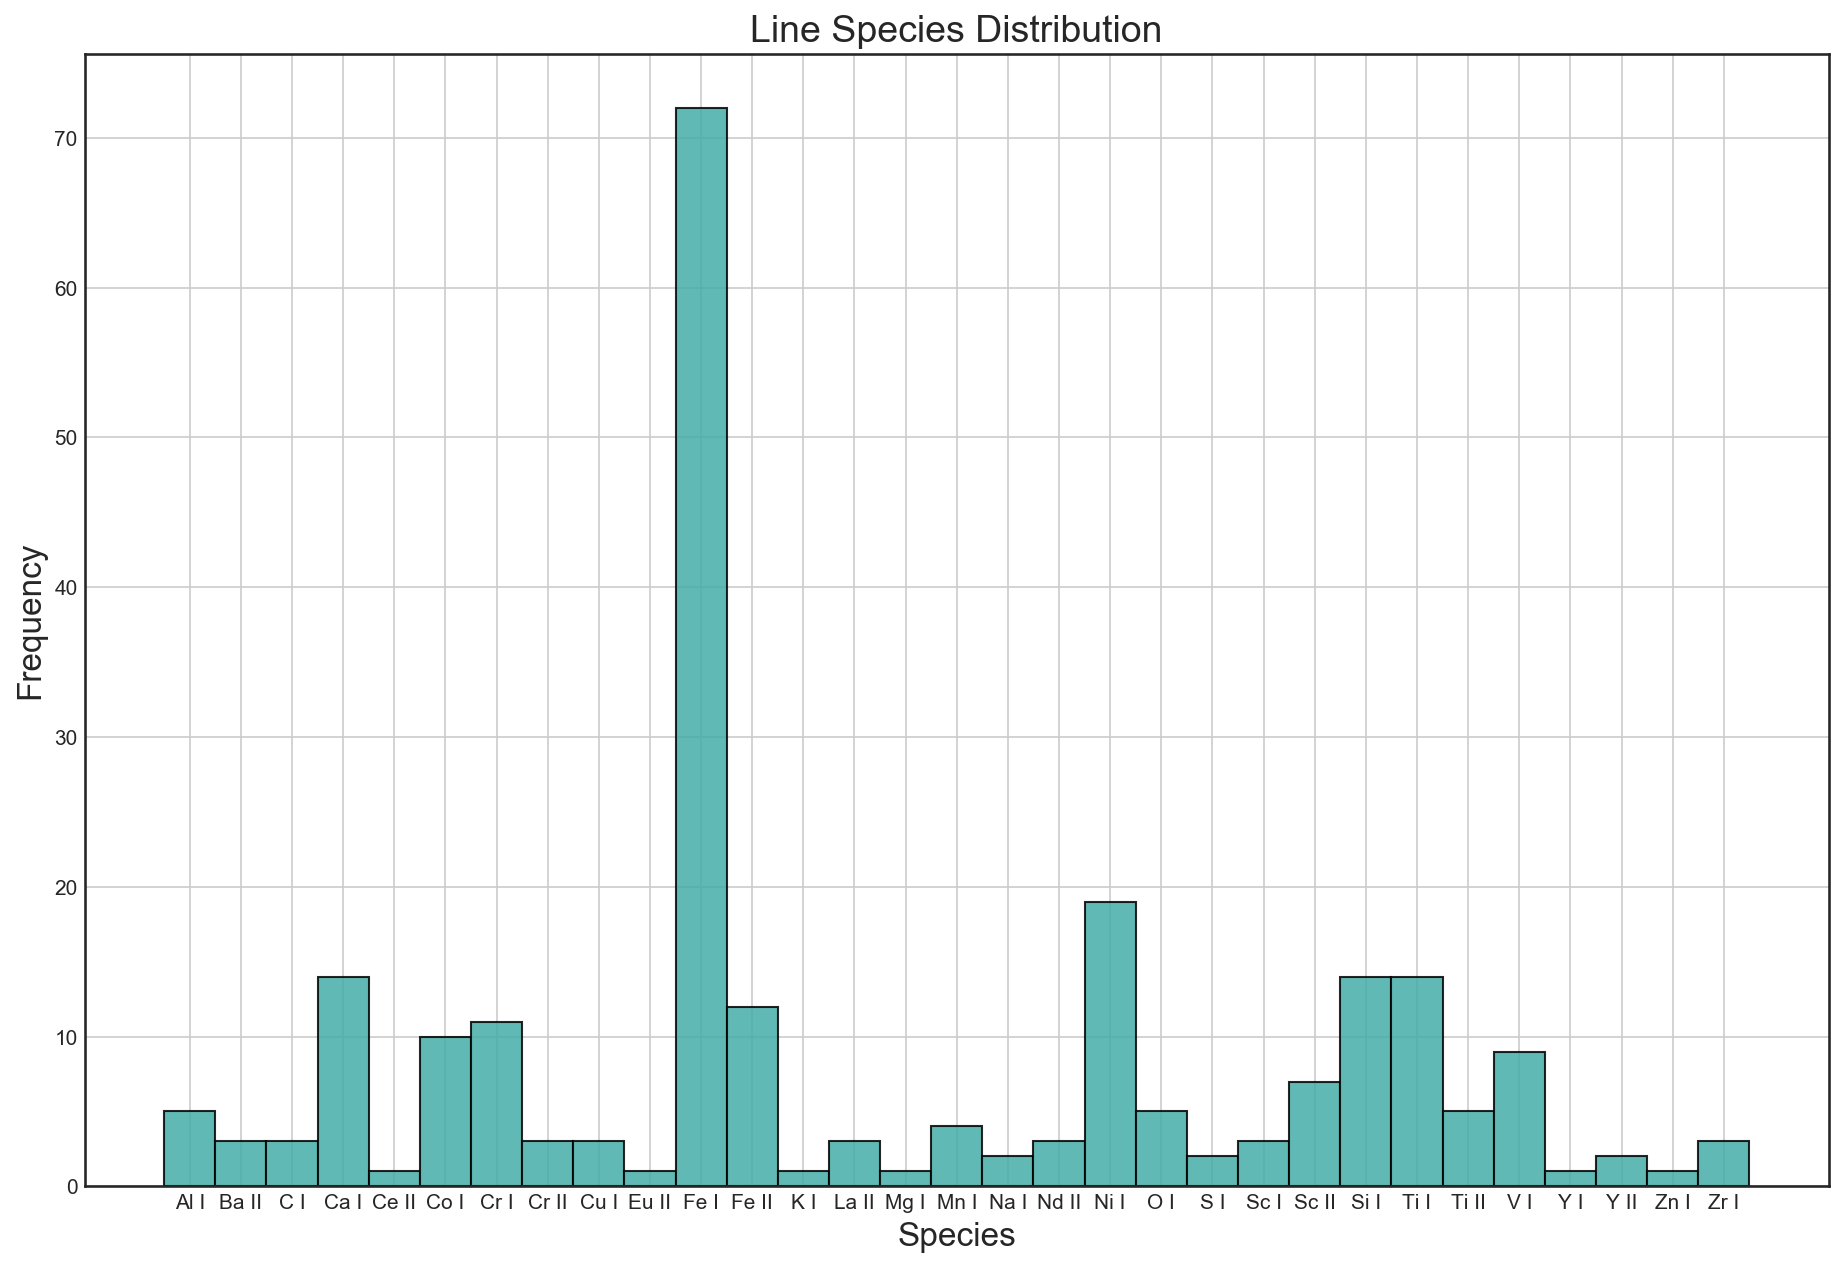

In [14]:
fig = plt.figure(figsize=(15,10))
fig.dpi=150
plt.title("Line Species Distribution", fontsize=18)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("Species", fontsize=16)
plt.hist(np.sort(master_line_list['Species']), ec='k', color='#45ADA8', alpha=0.85, bins=np.arange(len(np.unique(master_line_list['Species']))+1)-0.5)
plt.grid()
plt.savefig("../plots/species_hist.png")